In [23]:
import matplotlib.pyplot as plt
from numpy import *
from scipy.optimize import curve_fit
import csv
import os,sys
from time import time

# local
sys.path.append(os.path.join('.','..'))
from simfuncs import *

imdir = 'trap_array_data'
os.chdir(os.path.join('.',imdir)) # should only be called once

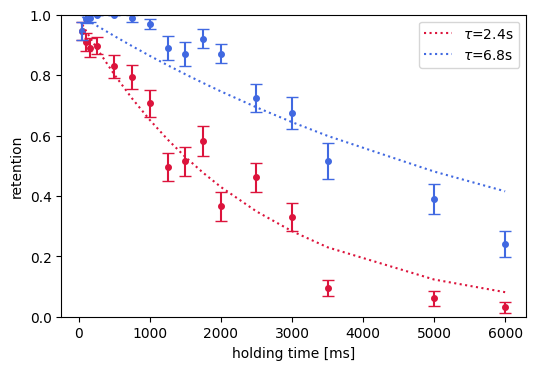

In [69]:
#plot the lifetimes
site0 = ['lifetime_roi0_coh_50_to_3500ms_20220131.csv','lifetime_roi0_coh_2000_to_4000ms_20220131.csv']
site1 = ['lifetime_roi1_coh_50_to_3500ms_20220131.csv','lifetime_roi1_coh_2000_to_4000ms_20220131.csv']
site2 = ['lifetime_roi2_coh_50_to_3500ms_20220131.csv','lifetime_roi2_coh_2000_to_4000ms_20220131.csv']

error = True
fit = True

colors = ['crimson','royalblue','forestgreen']
sites = [site0,site1] #,site2]

def model(t,a,tau):
    return a*exp(-t/tau)

fig,ax = plt.subplots(dpi=100)

exclude = [14] # indices of data to drop if seems like an outlier

for i,site,color in zip(range(len(sites)),sites,colors):

    rpts = []
    tpts = []
    lpts = []

    for f in site:
        data, labels = soln_from_csv(f)
        fff,rrr,lll = data
        rpts += list(rrr)
        tpts += list(fff)
        lpts += list(lll)

    rpts = [rpts[i] for i in range(len(rpts)) if i not in exclude]
    tpts = [tpts[i] for i in range(len(tpts)) if i not in exclude]
    lpts = [lpts[i] for i in range(len(lpts)) if i not in exclude]

    rrr = real(array(rpts))
    fff = real(array(tpts))
    lll = real(array(lpts))

    rrr_err=real(np.sqrt(rrr-rrr**2)/np.sqrt(lll))
    if error:
        ax.errorbar(fff,rrr,yerr=rrr_err,color=color,ls='none',capsize=4)#,label=f'site={i}')
        ax.scatter(fff,rrr,color=color,marker='.',linewidths=2)
    else:
        ax.scatter(fff,rrr,color=color)

    if fit:
        popt, pcov = curve_fit(model,fff,rrr,bounds=([0.4,1000],[1,8000]))
        a,tau = popt
        ax.plot(fff,model(fff,a,tau),label=r'$\tau$'+f'={tau/1e3:.2}s',color=color,linestyle=':')


ax.legend()
ax.set_ylim((0,1))
ax.set_ylabel("retention")
ax.set_xlabel("holding time [ms]")
plt.show()

In [46]:
len(rpts)

17

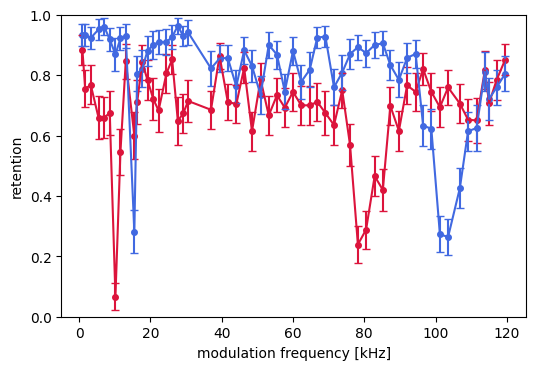

In [90]:
#plot the trap frequencies
# site0 = ['highfreqs_roi0_coh_20220129.csv','midfreqs_roi0_coh_20220129.csv','lowfreqs_roi0_coh_20220129.csv']
# site1 = ['highfreqs_roi1_coh_20220129.csv','midfreqs_roi1_coh_20220129.csv','lowfreqs_roi1_coh_20220129.csv']
# site2 = ['highfreqs_roi2_coh_20220129.csv','midfreqs_roi2_coh_20220129.csv','lowfreqs_roi2_coh_20220129.csv']

site0 = ['lowfreqs_roi0_coh_20220129.csv','midfreqs_roi0_coh_20220129.csv','highfreqs_roi0_coh_20220129.csv']
site1 = ['lowfreqs_roi1_coh_20220129.csv','midfreqs_roi1_coh_20220129.csv','highfreqs_roi1_coh_20220129.csv']
site2 = ['lowfreqs_roi2_coh_20220129.csv','midfreqs_roi2_coh_20220129.csv','highfreqs_roi2_coh_20220129.csv']

colors = ['crimson','royalblue','forestgreen']
sites = [site0,site1]#,site2]

fig,ax = plt.subplots(dpi=100)

for i,site,color in zip(range(len(sites)),sites,colors):

    fff = array([])
    rrr = array([])
    lll = array([])
    for f in site:
        data, labels = soln_from_csv(f)
        f,r,l = data
        fff = append(fff,f)
        rrr = append(rrr,r)
        lll = append(lll,l)
        
    rrr_err=real(np.sqrt(rrr-rrr**2)/np.sqrt(lll))
    if error:
        ax.errorbar(real(fff),real(rrr),yerr=rrr_err,color=color,capsize=3)#,label=f'site={i}')
        ax.scatter(real(fff),real(rrr),color=color,marker='.',linewidths=2)
    else:
        ax.plot(real(fff),real(rrr),yerr=rrr_err,color=color)
        
# ax.legend()
ax.set_ylim((0,1))
ax.set_ylabel("retention")
ax.set_xlabel("modulation frequency [kHz]")
plt.show()

In [87]:
f

array([ 0.937+0.j,  1.718+0.j,  3.28 +0.j,  5.46 +0.j,  7.03 +0.j,
        8.6  +0.j, 10.2  +0.j, 11.6  +0.j, 13.1  +0.j, 15.5  +0.j,
       16.3  +0.j, 17.7  +0.j, 19.2  +0.j, 20.8  +0.j, 22.3  +0.j,
       24.5  +0.j, 26.1  +0.j, 27.7  +0.j, 29.2  +0.j, 30.6  +0.j])

In [79]:
append?